# Handle Ouliers Data.
1. Z-Score Method. 
2. IQR Box Plot.
3. Percentile  Winsorization.
# Z-Score
## xi' = xi-µ/σ

# When apply Z-Score Method.
### If data is normally distributed Then we apply Z-Score Method.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20210525140711/empiricalrule-660x388.png" width="500"/>

# After the µ+3σ And before the µ-3σ, we considered Outliers.

# Outliers Treatment
1.Triming 2.Capping 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("placement01.csv")

In [3]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [4]:
df.shape

(1000, 3)

# First we check our data is normally distributed or not.

In [5]:
import seaborn as sns
plt.style.use("fivethirtyeight")

<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

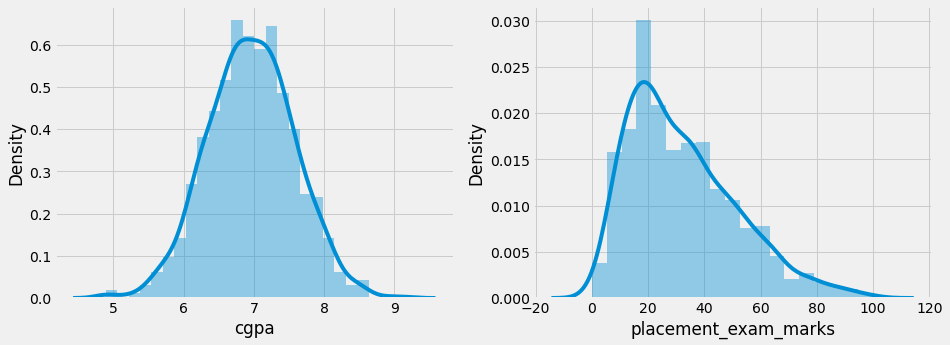

In [6]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.distplot(df["cgpa"])

plt.subplot(122)
sns.distplot(df["placement_exam_marks"])

<AxesSubplot:xlabel='placement_exam_marks'>

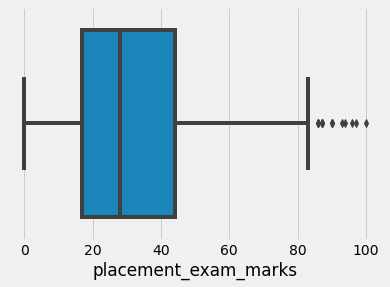

In [26]:
sns.boxplot(df["placement_exam_marks"])

<AxesSubplot:xlabel='cgpa'>

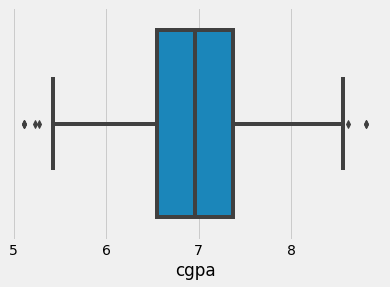

In [27]:
sns.boxplot(df["cgpa"])

In [7]:
df["placement_exam_marks"].skew()

0.8356419499466834

In [8]:
df["cgpa"].skew().round(2)

-0.01

# We see that our Z-Score Method in only valid on cgpa column because cgpa is normally distributed.

### Finding the boundary values. µ+3σ µ-3σ

In [9]:
print("Highest allowed ",df["cgpa"].mean() + 3*df["cgpa"].std())
print("Lowest allowed ",df["cgpa"].mean() - 3*df["cgpa"].std())

Highest allowed  8.808933625397177
Lowest allowed  5.113546374602842


In [10]:
df[(df["cgpa"]>8.80) | (df["cgpa"]<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Triming

In [11]:
newdf = df[(df["cgpa"] < 8.80) & (df["cgpa"] > 5.11)]

In [12]:
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [13]:
newdf.shape

(995, 3)

In [14]:
newdf[(df["cgpa"]>8.80) | (df["cgpa"]<5.11)]

,cgpa,placement_exam_marks,placed


In [15]:
# Z-Score
# df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()
# new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]
# new_df

# Caping

In [16]:
Upperbound = df["cgpa"].mean() + 3 * df["cgpa"].std()
Lowerbound = df["cgpa"].mean() -  3 * df["cgpa"].std()
Upperbound, Lowerbound

(8.808933625397177, 5.113546374602842)

In [17]:
df['cgpa'] = np.where(
    df["cgpa"]>Upperbound,
    Upperbound,
    np.where(
            df["cgpa"]<Lowerbound,
        Lowerbound,
        df["cgpa"] )
        )

In [20]:
df.shape

(1000, 3)

In [23]:
df["cgpa"].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

In [25]:
print("Highest allowed ",df["placement_exam_marks"].mean() + 3*df["placement_exam_marks"].std())
print("Lowest allowed ",df["placement_exam_marks"].mean() - 3*df["placement_exam_marks"].std())

Highest allowed  89.61746701676324
Lowest allowed  -25.167467016763247
